In [1]:
import datetime
from datetime import timedelta
from time import strftime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read meter data from csv  
test_data = pd.read_csv('63wallst_15mins.csv')
test_data['time'] = pd.to_datetime(test_data['time'])
test_data['Time'] = pd.to_datetime(test_data['time']).dt.time
test_data['Date'] = pd.to_datetime(test_data['time']).dt.date
test_data['Week'] = test_data['time'].dt.strftime("%U")
test_data['Day'] = test_data['time'].dt.strftime("%j")  
test_data['Weekday'] = test_data['time'].dt.strftime("%w")
test_data['Hour'] = pd.to_datetime(test_data['time']).dt.hour
#groupby to find max demand for each day
idx = test_data.groupby(['Day'])['demand'].transform(max) == test_data['demand']
demand_data = test_data[idx].drop_duplicates(['Day'], keep='first', ignore_index=True)
demand_data

,time,demand,Time,Date,Week,Day,Weekday,Hour
0,2021-07-07 19:49:00,440.0,19:49:00,2021-07-07,27,188,3,19
1,2021-07-08 12:34:00,440.0,12:34:00,2021-07-08,27,189,4,12
2,2021-07-09 16:49:00,424.0,16:49:00,2021-07-09,27,190,5,16
3,2021-07-10 14:04:00,416.0,14:04:00,2021-07-10,27,191,6,14
4,2021-07-11 17:34:00,408.0,17:34:00,2021-07-11,28,192,0,17
...,...,...,...,...,...,...,...,...
94,2021-10-09 14:38:00,352.0,14:38:00,2021-10-09,40,282,6,14
95,2021-10-10 14:53:00,360.0,14:53:00,2021-10-10,41,283,0,14
96,2021-10-11 20:23:00,376.0,20:23:00,2021-10-11,41,284,1,20
97,2021-10-12 19:38:00,360.0,19:38:00,2021-10-12,41,285,2,19


In [3]:
weather = pd.read_csv('2752406.csv')
temperature = pd.DataFrame({'DateTime':weather['DATE'], 'Temp':weather['HourlyDryBulbTemperature'],'Humidity':weather['HourlyRelativeHumidity']}).dropna()
temperature['Temp'] = pd.to_numeric(temperature['Temp'], errors='coerce')
temperature['time'] = pd.to_datetime(temperature['DateTime'])
temperature['Time'] = pd.to_datetime(temperature['time']).dt.time
temperature['Date'] = pd.to_datetime(temperature['time']).dt.date
temperature['Day'] = temperature['time'].dt.strftime("%j")
temperature['Hour'] = pd.to_datetime(temperature['time']).dt.hour

idx = temperature.groupby(['Day'])['Temp'].transform(max) == temperature['Temp']
temp_data = temperature[idx]
temp_data = temp_data[idx].drop_duplicates(['Day'], keep='first', ignore_index=True)
temp_data

<ipython-input-3-a28a71e1e10f>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_data = temp_data[idx].drop_duplicates(['Day'], keep='first', ignore_index=True)


,DateTime,Temp,Humidity,time,Time,Date,Day,Hour
0,2021-07-08T10:51:00,84.0,65,2021-07-08 10:51:00,10:51:00,2021-07-08,189,10
1,2021-07-09T15:51:00,85.0,59,2021-07-09 15:51:00,15:51:00,2021-07-09,190,15
2,2021-07-10T15:51:00,81.0,61,2021-07-10 15:51:00,15:51:00,2021-07-10,191,15
3,2021-07-11T13:51:00,78.0,74,2021-07-11 13:51:00,13:51:00,2021-07-11,192,13
4,2021-07-12T12:51:00,85.0,68,2021-07-12 12:51:00,12:51:00,2021-07-12,193,12
...,...,...,...,...,...,...,...,...
93,2021-10-09T11:42:00,67.0,71,2021-10-09 11:42:00,11:42:00,2021-10-09,282,11
94,2021-10-10T15:51:00,66.0,84,2021-10-10 15:51:00,15:51:00,2021-10-10,283,15
95,2021-10-11T13:51:00,70.0,66,2021-10-11 13:51:00,13:51:00,2021-10-11,284,13
96,2021-10-12T14:26:00,69.0,68,2021-10-12 14:26:00,14:26:00,2021-10-12,285,14


In [4]:
# Humidity dataset, do not run this cell unless adding humidity data
weather = pd.read_csv('2752406.csv')
temperature = pd.DataFrame({'DateTime':weather['DATE'], 'Temp':weather['HourlyDryBulbTemperature'],'Humidity':weather['HourlyRelativeHumidity']}).dropna()
temperature['Humidity'] = pd.to_numeric(temperature['Humidity'], errors='coerce')
temperature['time'] = pd.to_datetime(temperature['DateTime'])
temperature['Time'] = pd.to_datetime(temperature['time']).dt.time
temperature['Date'] = pd.to_datetime(temperature['time']).dt.date
temperature['Day'] = temperature['time'].dt.strftime("%j")
temperature['Hour'] = pd.to_datetime(temperature['time']).dt.hour
idx = temperature.groupby(['Day'])['Humidity'].transform(max) == temperature['Humidity']

Humidity_data = temperature[idx]
Humidity_data = Humidity_data[idx].drop_duplicates(['Day'], keep='first', ignore_index=True)
Humidity_data

<ipython-input-4-b9b16dccd8fc>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Humidity_data = Humidity_data[idx].drop_duplicates(['Day'], keep='first', ignore_index=True)


,DateTime,Temp,Humidity,time,Time,Date,Day,Hour
0,2021-07-08T14:45:00,72,100.0,2021-07-08 14:45:00,14:45:00,2021-07-08,189,14
1,2021-07-09T05:48:00,72,100.0,2021-07-09 05:48:00,05:48:00,2021-07-09,190,5
2,2021-07-10T02:51:00,70,97.0,2021-07-10 02:51:00,02:51:00,2021-07-10,191,2
3,2021-07-11T02:27:00,70,97.0,2021-07-11 02:27:00,02:27:00,2021-07-11,192,2
4,2021-07-12T03:51:00,72,97.0,2021-07-12 03:51:00,03:51:00,2021-07-12,193,3
...,...,...,...,...,...,...,...,...
93,2021-10-09T03:49:00,61,83.0,2021-10-09 03:49:00,03:49:00,2021-10-09,282,3
94,2021-10-10T12:16:00,63,97.0,2021-10-10 12:16:00,12:16:00,2021-10-10,283,12
95,2021-10-11T23:51:00,62,86.0,2021-10-11 23:51:00,23:51:00,2021-10-11,284,23
96,2021-10-12T23:21:00,63,90.0,2021-10-12 23:21:00,23:21:00,2021-10-12,285,23


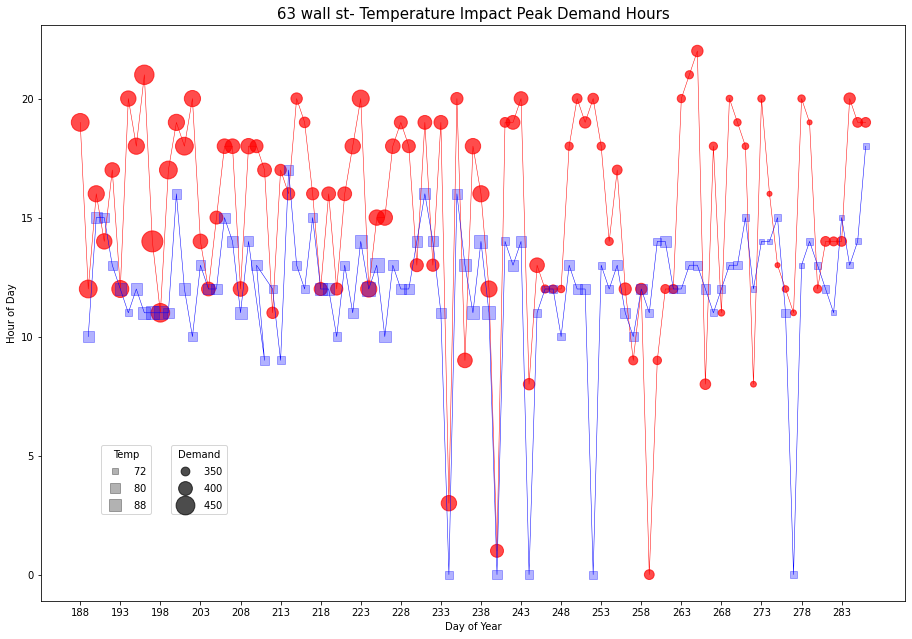

In [4]:
fig=plt.figure()
ax=fig.add_axes([0,0,2,2])

# https://stackoverflow.com/questions/59428303/how-to-scale-legend-elements-down-in-a-scatterplot-matplotlib
f = lambda a: ((a-262)*0.1)**2       # function to calculate size from data
g = lambda s: (np.sqrt(s)*10) +262 # inverse function to calc. data from size

m = lambda a: 0.1*((a-50)**2)      # function to calculate size from data
l = lambda s: (np.sqrt(s*10)) +50   # inverse function to calc. data from size

sc = ax.scatter('Day', 'Hour', s= f(demand_data['demand']),c='r', alpha=0.7,data= demand_data)
sc2 = ax.scatter('Day', 'Hour', s= m(temp_data['Temp']), c= 'b',marker='s',alpha=0.3,data= temp_data)

line1 = ax.plot('Day', 'Hour',c='r',linewidth = '.5', data= demand_data)
line2 = ax.plot('Day', 'Hour',c='b', linewidth = '.5',data= temp_data)
#line3 = ax.plot('Day', 'Hour',c='y', linewidth = '.5',data= Humidity_data)

ax.set_xticks(ax.get_xticks()[::5])
ax.set_xlabel(r'Day of Year', fontsize=10)
ax.set_ylabel(r'Hour of Day', fontsize=10)
ax.set_title('63 wall st- Temperature Impact Peak Demand Hours',fontsize = 15)
plt.legend(["Demand", "Temperature"], prop={"size":10})

legend1 = ax.legend(*sc.legend_elements("sizes", num=4, func=g),loc=(0.15, 0.15), title="Demand")
ax.add_artist(legend1)
legend2 = ax.legend(*sc2.legend_elements("sizes", num=4, func=l),loc=(0.07,0.15), title="Temp")

#plt.savefig('k1.png', format="png")
plt.show()